## 🔁 Agentic Pipeline Overview

Input: Keyword or topic (e.g., "CAR-T therapy")

Steps (Agentic Workflow):

Search & Retrieve Data – Use PubMed via Entrez API to fetch abstracts + metadata.

Preprocess – Parse abstracts, extract date info.

Trend Analysis – Use pandas/matplotlib to visualize publication trends.

LLM Summarization Agent (via LangChain + Gemini) – Summarize trends, detect emerging/declining topics.

Output – Text summary + trend plot.

In [2]:
import os
from Bio import Entrez
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
from langchain.prompts import PromptTemplate
from langchain.chains import LLMChain
from langchain_google_genai import ChatGoogleGenerativeAI
from dotenv import load_dotenv
load_dotenv()

python-dotenv could not parse statement starting at line 4


True

In [3]:
# Step 0: Set Email & API Keys
Entrez.email = "annusingh10091995@gmail.com"


In [4]:

# Step 1: Fetch Publications from PubMed
def fetch_pubmed_abstracts(query, max_results=100):
    handle = Entrez.esearch(db="pubmed", term=query, retmax=max_results)
    record = Entrez.read(handle)
    ids = record["IdList"]
    abstracts = []

    if not ids:
        return []

    handle = Entrez.efetch(db="pubmed", id=",".join(ids), rettype="medline", retmode="text")
    records = handle.read().split("\n\n")
    
    for rec in records:
        lines = rec.split("\n")
        pub_date, title = None, ""
        for line in lines:
            if line.startswith("TI  -"):
                title = line.replace("TI  -", "").strip()
            elif line.startswith("DP  -"):
                pub_date = line.replace("DP  -", "").strip()
        if pub_date:
            try:
                year = int(pub_date[:4])
                abstracts.append({"title": title, "year": year})
            except:
                continue
    return abstracts


In [5]:
# Step 2: Analyze Trends
def analyze_trend(abstracts, topic):
    df = pd.DataFrame(abstracts)
    trend = df.groupby("year").size()
    trend.plot(kind='bar', title=f"Publication Trend for {topic}")
    plt.xlabel("Year")
    plt.ylabel("Number of Publications")
    plt.grid()
    plt.tight_layout()
    plt.savefig("trend_plot.png")
    plt.show()
    return df



In [6]:
# Step 3: Summarize with Gemini LLM
def summarize_with_gemini(abstracts, topic):
    all_titles = "\n".join([a["title"] for a in abstracts[:50]])
    prompt_template = PromptTemplate(
        input_variables=["topic", "titles"],
        template="""
        Analyze the research trend for the topic "{topic}" based on the following publication titles:

        {titles}

        Provide insights on:
        - Emerging areas
        - Declining interest (if any)
        - Suggestions for funding or research
        - Summary in <200 words
        """
    )

    #llm = GoogleGenerativeAI(model="gemini-pro", temperature=0.4)
    llm = ChatGoogleGenerativeAI(model="gemini-2.0-flash", temperature=0.3)

    chain = LLMChain(llm=llm, prompt=prompt_template)

    return chain.run({"topic": topic, "titles": all_titles})


In [15]:
topic = "Explainable AI (XAI) for Segmentation"
print(f"🔍 Searching PubMed for: {topic}")
abstracts = fetch_pubmed_abstracts(topic, max_results=200)


🔍 Searching PubMed for: Explainable AI (XAI) for Segmentation


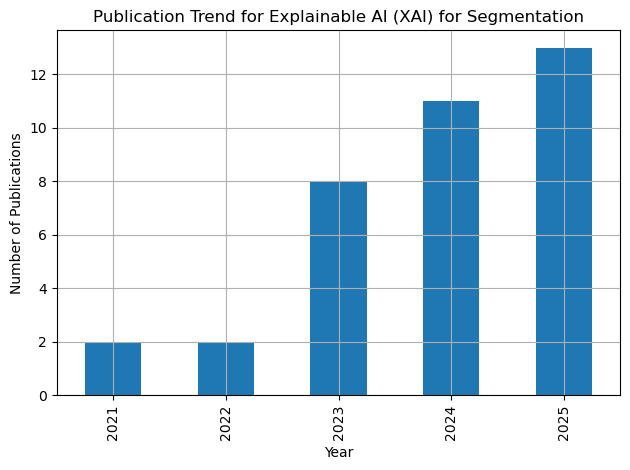

📈 Trend analysis complete.
🤖 Summarizing with Gemini LLM...

📋 LLM Summary:
Based on the provided titles, the research trend for "Explainable AI (XAI) for Segmentation" shows a strong and growing interest, particularly within the medical imaging domain.

**Emerging Areas:**

*   **Medical Imaging:** This is the dominant area, with applications spanning diabetic retinopathy, brain tumors, coronary artery segmentation, fetal growth scans, kidney tumors, acute lymphoblastic leukemia, COVID-19 detection, and more. The focus is on improving diagnostic accuracy, clinical usability, and trust in AI-driven medical decisions.
*   **Specific XAI Techniques:** Neuro-XAI (combining deep learning with Bayesian methods), counterfactual explanations, saliency maps, and ensemble-based explainers are being explored.
*   **Fairness and Bias:** The "FairXAI" title indicates a growing awareness of fairness considerations in XAI for segmentation.
*   **Multimodal Data:** Research is exploring XAI for segme

In [16]:
if not abstracts:
        print("No abstracts found.")
else:
    df = analyze_trend(abstracts, topic)
    print("📈 Trend analysis complete.")
    print("🤖 Summarizing with Gemini LLM...")
    summary = summarize_with_gemini(abstracts, topic)
    print("\n📋 LLM Summary:")
    print(summary)

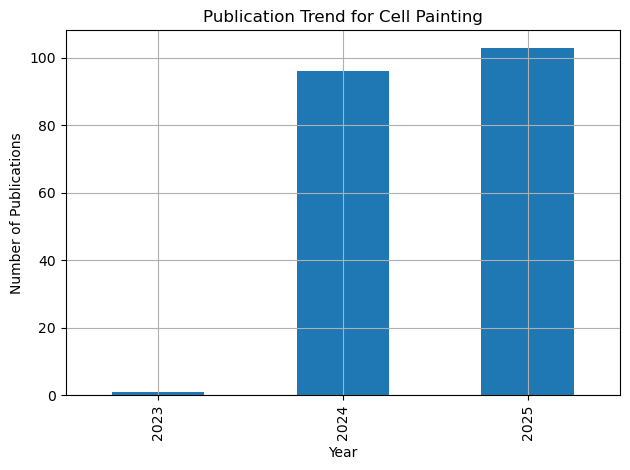

📈 Trend analysis complete.
🤖 Summarizing with Gemini LLM...

📋 LLM Summary:
Based on the provided titles, the research trend for "Cell Painting" reveals several key insights:

**Emerging Areas:**

*   **Increased Multiplexing and Advanced Imaging:** "Cell Painting PLUS," "Advanced fluorescence lifetime-enhanced multiplexed nanoscopy," and "Protocol for SUM-PAINT spatial proteomic imaging" indicate a strong trend towards enhancing the complexity and resolution of Cell Painting assays. This includes spatial proteomics and advanced microscopy techniques.
*   **Integration with Machine Learning:** Titles like "Cell Painting and Machine Learning Distinguish Fibroblasts" and "CPHNet: a novel pipeline for anti-HAPE drug screening via deep learning-based" highlight the growing use of machine learning for analyzing Cell Painting data, enabling more sophisticated phenotypic profiling and prediction.
*   **Applications in Specific Cell Types and Diseases:** Several titles demonstrate the applicat

In [12]:
if not abstracts:
        print("No abstracts found.")
else:
    df = analyze_trend(abstracts, topic)
    print("📈 Trend analysis complete.")
    print("🤖 Summarizing with Gemini LLM...")
    summary = summarize_with_gemini(abstracts, topic)
    print("\n📋 LLM Summary:")
    print(summary)

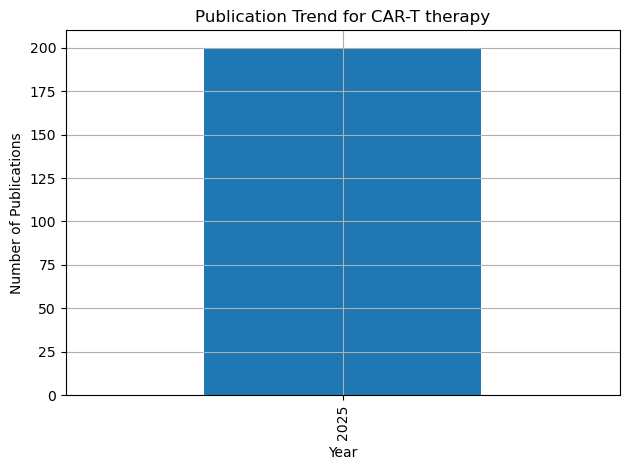

📈 Trend analysis complete.
🤖 Summarizing with Gemini LLM...


C:\Users\Annu\AppData\Local\Temp\ipykernel_34128\416311574.py:22: LangChainDeprecationWarning: The class `LLMChain` was deprecated in LangChain 0.1.17 and will be removed in 1.0. Use :meth:`~RunnableSequence, e.g., `prompt | llm`` instead.
  chain = LLMChain(llm=llm, prompt=prompt_template)
C:\Users\Annu\AppData\Local\Temp\ipykernel_34128\416311574.py:24: LangChainDeprecationWarning: The method `Chain.run` was deprecated in langchain 0.1.0 and will be removed in 1.0. Use :meth:`~invoke` instead.
  return chain.run({"topic": topic, "titles": all_titles})



📋 LLM Summary:
Here's an analysis of the CAR-T therapy research trends based on the provided publication titles:

**Emerging Areas:**

*   **Novel CAR Targets & Bispecific CARs:**  Beyond CD19 and BCMA, research is exploring targets like GPRC5D (in bispecific CARs), mesothelin (pancreatic cancer), and even KRAS (colorectal cancer). This indicates a push to expand CAR-T therapy to solid tumors and other hematological malignancies.
*   **CAR-NK Cells & Alternative Cell Sources:**  Significant interest exists in CAR-NK cells, including those derived from pluripotent stem cells and gamma delta T cells. This addresses limitations of autologous T-cell therapy, such as T-cell exhaustion and manufacturing challenges.
*   **Enhancing CAR-T Efficacy & Overcoming Resistance:**  Strategies to improve CAR-T cell function are prominent. This includes:
    *   Using nanomaterials (nanoinducers, lipid nanoparticles) for targeted delivery, mitochondrial modulation, and sensitizing tumors.
    *   Comb

In [10]:
if not abstracts:
        print("No abstracts found.")
else:
    df = analyze_trend(abstracts, topic)
    print("📈 Trend analysis complete.")
    print("🤖 Summarizing with Gemini LLM...")
    summary = summarize_with_gemini(abstracts, topic)
    print("\n📋 LLM Summary:")
    print(summary)